In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/star-dataset/6 class csv.csv


In [31]:
df=pd.read_csv('/kaggle/input/star-dataset/6 class csv.csv')

In [32]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [34]:
order_map = {'O': 0, 'B': 1, 'A': 2, 'F': 3, 'G': 4, 'K': 5, 'M': 6}
df["mapped_spec"] = df["Spectral Class"].map(order_map)

Remapping the spectral class values to number in ascending order from 0 to 6. This will ensure the values to appeared in the correct order in the scatter plot.

In [35]:
star_type_color={0:'brown', 1:'red', 2:'white', 3:'orange', 4:'yellow', 5:'royalblue'}
type_map_color=df['Star type'].map(star_type_color)

There are six different type of star represented by number from 0 to 5 in the dataframe. They will be mapped to a color accordingly:

0: Brown Dwarf: brown, 
1: Red Dwarf: red, 
2: White Dwarf: white, 
3: Main Sequence: orange, 
4: Supergiant: yellow, 
5: Hypergiant: royalblue

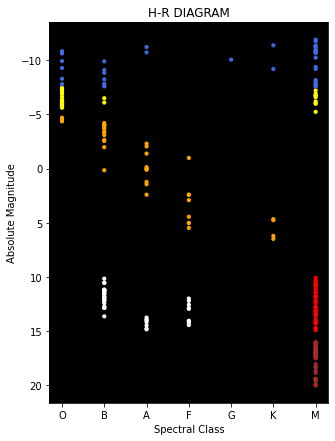

In [36]:
fig, ax = plt.subplots(figsize=(5, 7))
ax.set_facecolor('black')

plt.gca().invert_yaxis()

ax.set_title("H-R DIAGRAM")
ax.set_xlabel("Spectral Class")
ax.set_ylabel("Absolute Magnitude")
ax.set_xticks(range(0,7,1))
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])

ax.scatter(df["mapped_spec"], df["Absolute magnitude(Mv)"], s=10, c=type_map_color)